In [1]:
import os
os.chdir('../scripts')
from analysis_tools_cython import *

In [2]:
lc, lc_info = import_lightcurve('../betapic/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

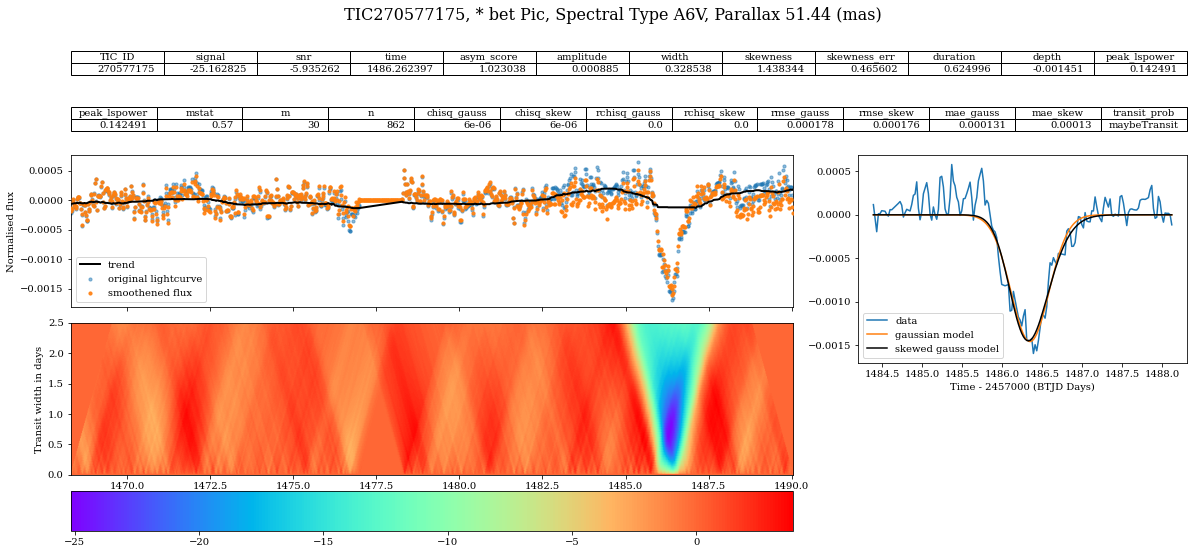

In [3]:
_, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [4]:
lc = lc['TIME','PDCSAP_FLUX','QUALITY','PDCSAP_FLUX_ERR']

In [5]:
t, flux, quality, real, flux_error = clean_data(lc)


In [6]:
timestep = calculate_timestep(lc)
factor = ((1/48)/timestep)

In [13]:
flux = normalise_flux(flux)

In [14]:
m,n,T1,minT,minT_time,minT_duration,Tm_start,Tm_end,Tm_depth,Ts = run_test_statistic(flux,timestep,factor,t)

In [25]:
Ts

1.0004789249672905

---

In [31]:
lc, lc_info = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_11_12/tesslc_155095859.pkl',sector=6)

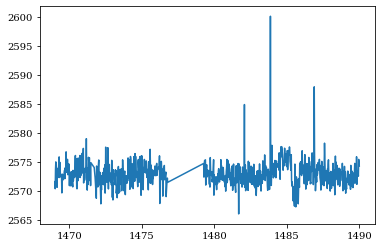

In [34]:
plt.plot(lc['time'],lc['corrected flux'])

In [36]:
lc = lc['time','corrected flux','quality','flux error']

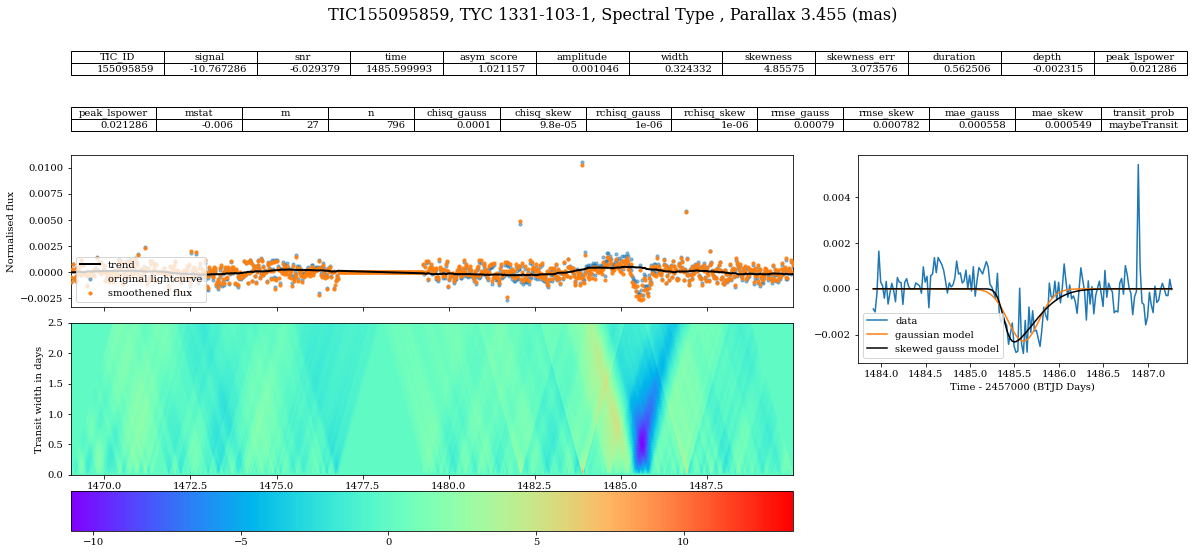

In [37]:
_, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [38]:
a = [1,2,34,5,6]

In [39]:
a[3]

5

In [45]:
fe = lc['flux error']/lc['corrected flux'].mean()

In [57]:
def skewed_gaussian_curve_fit(x,y,y_err):
    """
    Fits a skewed Gaussian curve to the given data points.

    Parameters:
        x (array-like): time.
        y (array-like): ligthcurve flux.
        y_err (array-like): Associated errors for lightcurve flux.

    Returns:
        tuple: A tuple containing two elements:
            - params (array-like): The optimized parameters of the skewed Gaussian curve fit.
            - cov (ndarray): The estimated covariance of the optimized parameters.
    """
    
    i = np.argmax(y)
    width = x[-1]-x[0]
    
    ### params initialisation for skewness, time, mean and sigma
    # amplitude, t0, sigma, skewness
    params_init = [y[i],x[i],width/3,1]
    
    params_bounds=[[0,x[0],0,-30], [np.inf,x[-1],width*3,30]]
    params,cov = curve_fit(skewed_gaussian,x,y,p0=params_init,sigma=y_err,bounds=params_bounds,maxfev=100000)
    
    return params, cov x

def skewed_gaussian(x, A, t0, sigma, alpha):
    """
    Skewed Gaussian function using the Skewed Student's t-distribution.

    Parameters:
        x: Input data points.
        A: Amplitude of the Gaussian.
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        alpha: Skewness parameter (positive for right-skewed, negative for left-skewed).

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    """
    y = A * skewnorm.pdf(x,alpha,loc=t0, scale=sigma)
    return y



In [58]:
params, pcov = skewed_gaussian_curve_fit(lc['time'],lc['corrected flux'],fe)

fit = skewed_gaussian(lc['time'], *params)

In [59]:
np.std((lc['corrected flux'] - fit))

10.687689724166177

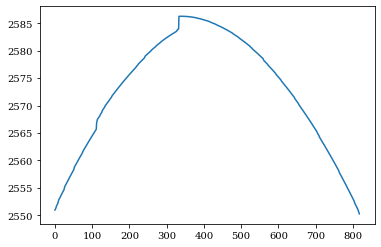

In [60]:
plt.plot(np.arange(len(fit)), fit)